## 1. Import Libraries

In [12]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning libraries
import sklearn
import tensorflow as tf
import torch
import keras

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import torch.nn as nn
import torch.optim as optim

# Model evaluation and metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# For data preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# For handling large datasets
import h5py
import os

## Goal = The amount of Days a home will be on the market

## Data Dictionary

### Active Listing Count
The count of active listings within the specified geography during the specified month. The active listing count tracks the number of for sale properties on the market, excluding pending listings where a pending status is available. This is a snapshot measure of how many active listings can be expected on any given day of the specified month.

### Active Listing Count M/M
The percentage change in the active listing count from the previous month.

### Active Listing Count Y/Y
The percentage change in the active listing count from the same month in the previous year.

### Avg Listing Price
The average listing price within the specified geography during the specified month.

### Avg Listing Price M/M
The percentage change in the average listing price from the previous month.

### Avg Listing Price Y/Y
The percentage change in the average listing price from the same month in the previous year.

### Days on Market
The median number of days property listings spend on the market within the specified geography during the specified month. Time spent on the market is defined as the time between the initial listing of a property and either its closing date or the date it is taken off the market.

### Days on Market M/M
The percentage change in the median days on market from the previous month.

### Days on Market Y/Y
The percentage change in the median days on market from the same month in the previous year.

### Demand Score
The demand score is an index representing a zip code, county or metro’s unique listing page viewers per property ranking compared to other zip codes, counties, or metros.

### Hotness Rank
The specified zip code, county, or metro area’s Hotness rank, by Hotness score, compared to all other zip codes, counties and metro areas. A rank value of 1 is considered the hottest (highest Hotness score).

### Hotness Rank (Change)
The change in Hotness rank from the previous month. A positive value indicates that the geography’s Hotness has decreased (moved down in ranking), and a negative value indicates that its Hotness has increased (moved up in ranking).

### Hotness Rank (Prev)
The specified zip code, county, or metro area’s Hotness rank in the previous month.

### Hotness Rank Within CBSA
In the case of a zip code or county, this metric represents the zip code or county’s Hotness rank, by Hotness score, compared to all other zip codes or counties within its metro area. A rank value of 1 is considered the hottest (highest Hotness score).

### Hotness Rank Within County
In the case of a zip code, this metric represents the zip code’s Hotness rank, by Hotness score, compared to all other zip codes within its county. A rank value of 1 is considered the hottest (highest Hotness score).

### Hotness Score
The Hotness score is an equally-weighted composite metric of a geography’s supply score and demand score.

### LDP Unique Viewers Per Property (vs US)
The count of viewers a typical property receives in the specified geography divided by the count of views a typical property receives in the US overall during the same month.

### LDP Unique Viewers Per Property M/M
The change in unique viewers a typical property receives in the specified geography from the previous month.

### LDP Unique Viewers Per Property Y/Y
The change in unique viewers a typical property receives in the specified geography from the same month in the previous year.

### Median DOM
The median number of days property listings spend on the market within the specified geography during the specified month. Time spent on the market is defined as the time between the initial listing of a property and either its closing date or the date it is taken off the market.

### Median DOM (vs US)
The median days on market in the specified geography divided by the median days on market for the US overall during the same month.

### Median DOM M/M
The change in days in the median days on market from the previous month.

### Median DOM M/M Perc
The percentage change in the median days on market from the previous month.

### Median DOM Y/Y
The change in days in the median days on market from the same month in the previous year.

### Median DOM Y/Y Perc
The percentage change in the median days on market from the same month in the previous year.

### Median List Price Per Sqft
The median listing price per square foot within the specified geography during the specified month.

### Median List Price Per Sqft M/M
The percentage change in the median listing price per square foot from the previous month.

### Median List Price Per Sqft Y/Y
The percentage change in the median listing price per square foot from the same month in the previous year.

### Median Listing Price
The median listing price within the specified geography during the specified month.

### Median Listing Price (vs US)
The median listing price within the specified geography divided by the median listing price for the US overall during the same month.

### Median Listing Price M/M
The percentage change in the median listing price from the previous month.

### Median Listing Price Y/Y
The percentage change in the median listing price from the same month in the previous year.

### Median Listing Sqft
The median listing square feet within the specified geography during the specified month.

### Median Listing Sqft M/M
The percentage change in the median listing square feet from the previous month.

### Median Listing Sqft Y/Y
The percentage change in the median listing square feet from the same month in the previous year.

### New Listing Count
The count of new listings added to the market within the specified geography. The new listing count represents a typical week’s worth of new listings in a given month. The new listing count can be multiplied by the number of weeks in a month to produce a monthly new listing count.

### New Listing Count M/M
The percentage change in the new listing count from the previous month.

### New Listing Count Y/Y
The percentage change in the new listing count from the same month in the previous year.

### Nielsen HH Rank
The specified zip code, county, or metro area’s rank by household count compared to other zip codes, counties and metro areas. A rank value of 1 is the highest by household count.

### Pending Listing Count
The count of pending listings within the specified geography during the specified month, if a pending definition is available for that geography. This is a snapshot measure of how many pending listings can be expected on any given day of the specified month.

### Pending Listing Count M/M
The percentage change in the pending listing count from the previous month.

### Pending Listing Count Y/Y
The percentage change in the pending listing count from the same month in the previous year.

### Pending Ratio
The ratio of the pending listing count to the active listing count within the specified geography during the specified month.

### Pending Ratio M/M
The change in the pending ratio from the previous month.

### Pending Ratio Y/Y
The change in the pending ratio from the same month in the previous year.

### Price Decrease Count
The count of listings which have had their price reduced within the specified geography. The price decrease count represents a typical week’s worth of listings which have had their price reduced in a given month. The price decrease count can be multiplied by the number of weeks in a month to produce a monthly price decrease count.

### Price Decrease Count M/M
The percentage change in the price decrease count from the previous month.

### Price Decrease Count Y/Y
The percentage change in the price decrease count from the same month in the previous year.

### Price Increase Count
The count of listings which have had their price increased within the specified geography. The price increase count represents a typical week’s worth of listings which have had their price increased in a given month. The price increase count can be multiplied by the number of weeks in a month to produce a monthly price increase count.

### Price Increase Count M/M
The percentage change in the price increase count from the previous month.

### Price Increase Count Y/Y
The percentage change in the price increase count from the same month in the previous year.

### Quality Flag
Triggered (“1”) when data values are outside of their typical range. While rare, these figures should be reviewed before reporting.

### Supply Score
The supply score is an index representing a zip code, county or metro’s median days on market ranking compared to other zip codes, counties, or metros.

### Total Listing Count
The total of both active listings and pending listings within the specified geography during the specified month. This is a snapshot measure of how many total listings can be expected on any given day of the specified month.

### Total Listing Count M/M
The percentage change in the total listing count from the previous month.

### Total Listing Count Y/Y
The percentage change in the total listing count from the same month in the previous year.


## 1.1 Reading in data

In [10]:
df = pd.read_csv("../Data/Houses-dataset/Houses Dataset/HousesInfo.txt", sep=' ', names = ['bedrooms','bathrooms','area','zipcode','price'])

In [22]:
image_dir = '../Data/Houses-dataset/Houses Dataset/'
df['frontal'] = df.index.to_series().apply(lambda x: os.path.join(image_dir, f'{x}_frontal.jpg'))
df['kitchen'] = df.index.to_series().apply(lambda x: os.path.join(image_dir, f'{x}_kitchen.jpg'))
df['bedroom'] = df.index.to_series().apply(lambda x: os.path.join(image_dir, f'{x}_bedroom.jpg'))
df['bathroom'] = df.index.to_series().apply(lambda x: os.path.join(image_dir, f'{x}_bathroom.jpg'))

## 2.1 EDA

In [23]:
df

,bedrooms,bathrooms,area,zipcode,price,frontal,kitchen,bedroom,bathroom
0,4,4.0,4053,85255,869500,../Data/Houses-dataset/Houses Dataset/0_fronta...,../Data/Houses-dataset/Houses Dataset/0_kitche...,../Data/Houses-dataset/Houses Dataset/0_bedroo...,../Data/Houses-dataset/Houses Dataset/0_bathro...
1,4,3.0,3343,36372,865200,../Data/Houses-dataset/Houses Dataset/1_fronta...,../Data/Houses-dataset/Houses Dataset/1_kitche...,../Data/Houses-dataset/Houses Dataset/1_bedroo...,../Data/Houses-dataset/Houses Dataset/1_bathro...
2,3,4.0,3923,85266,889000,../Data/Houses-dataset/Houses Dataset/2_fronta...,../Data/Houses-dataset/Houses Dataset/2_kitche...,../Data/Houses-dataset/Houses Dataset/2_bedroo...,../Data/Houses-dataset/Houses Dataset/2_bathro...
3,5,5.0,4022,85262,910000,../Data/Houses-dataset/Houses Dataset/3_fronta...,../Data/Houses-dataset/Houses Dataset/3_kitche...,../Data/Houses-dataset/Houses Dataset/3_bedroo...,../Data/Houses-dataset/Houses Dataset/3_bathro...
4,3,4.0,4116,85266,971226,../Data/Houses-dataset/Houses Dataset/4_fronta...,../Data/Houses-dataset/Houses Dataset/4_kitche...,../Data/Houses-dataset/Houses Dataset/4_bedroo...,../Data/Houses-dataset/Houses Dataset/4_bathro...
...,...,...,...,...,...,...,...,...,...
530,5,2.0,2066,94531,399900,../Data/Houses-dataset/Houses Dataset/530_fron...,../Data/Houses-dataset/Houses Dataset/530_kitc...,../Data/Houses-dataset/Houses Dataset/530_bedr...,../Data/Houses-dataset/Houses Dataset/530_bath...
531,4,3.5,9536,94531,460000,../Data/Houses-dataset/Houses Dataset/531_fron...,../Data/Houses-dataset/Houses Dataset/531_kitc...,../Data/Houses-dataset/Houses Dataset/531_bedr...,../Data/Houses-dataset/Houses Dataset/531_bath...
532,3,2.0,2014,94531,407000,../Data/Houses-dataset/Houses Dataset/532_fron...,../Data/Houses-dataset/Houses Dataset/532_kitc...,../Data/Houses-dataset/Houses Dataset/532_bedr...,../Data/Houses-dataset/Houses Dataset/532_bath...
533,4,3.0,2312,94531,419000,../Data/Houses-dataset/Houses Dataset/533_fron...,../Data/Houses-dataset/Houses Dataset/533_kitc...,../Data/Houses-dataset/Houses Dataset/533_bedr...,../Data/Houses-dataset/Houses Dataset/533_bath...


In [24]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'zipcode', 'price', 'frontal',
       'kitchen', 'bedroom', 'bathroom'],
      dtype='object')

In [27]:
print(df.shape)
print(df.shape[0])
print(df.isnull().values.sum())
df = df.drop_duplicates()
print(df.dtypes)
#df.describe

(535, 9)
535
0
bedrooms       int64
bathrooms    float64
area           int64
zipcode        int64
price          int64
frontal       object
kitchen       object
bedroom       object
bathroom      object
dtype: object


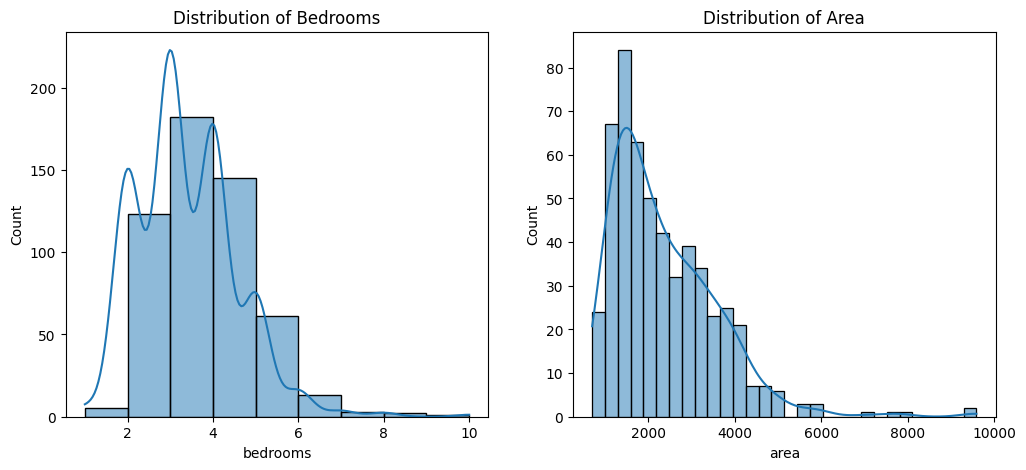

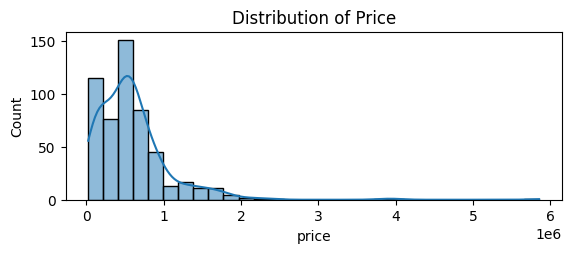

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['bedrooms'], bins=range(df['bedrooms'].min(), df['bedrooms'].max() + 1), kde=True)
plt.title('Distribution of Bedrooms')

plt.subplot(1, 2, 2)
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Area')
plt.show()

plt.subplot(2, 1, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()